# Plotly

In [1]:
import pandas as pd
import plotly.express as px 
import plotly.graph_objects as go

## Histogram

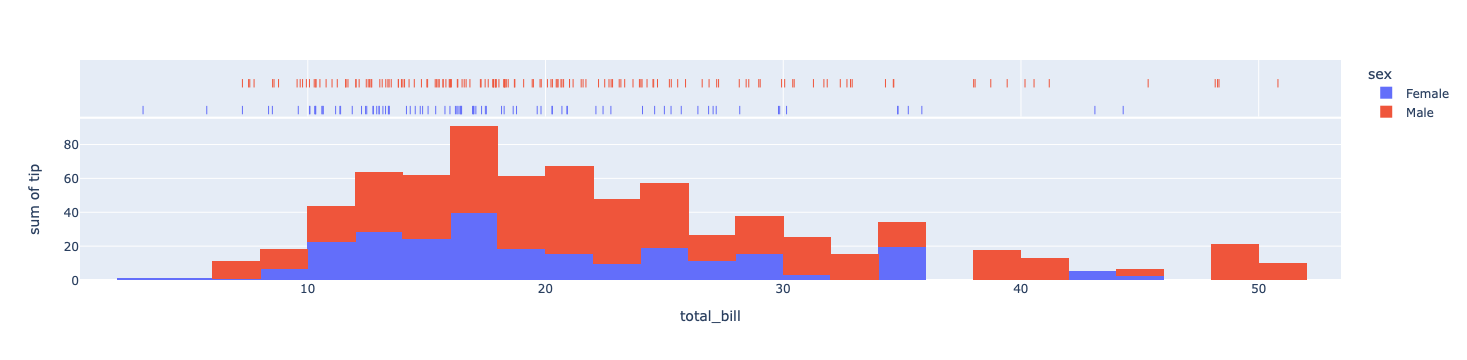

In [33]:
df = px.data.tips()
fig = px.histogram(df, 
                   x="total_bill", 
                   y="tip", 
                   color="sex", 
                   marginal="rug", 
                   hover_data=df.columns)
fig.show()

## Boxplot

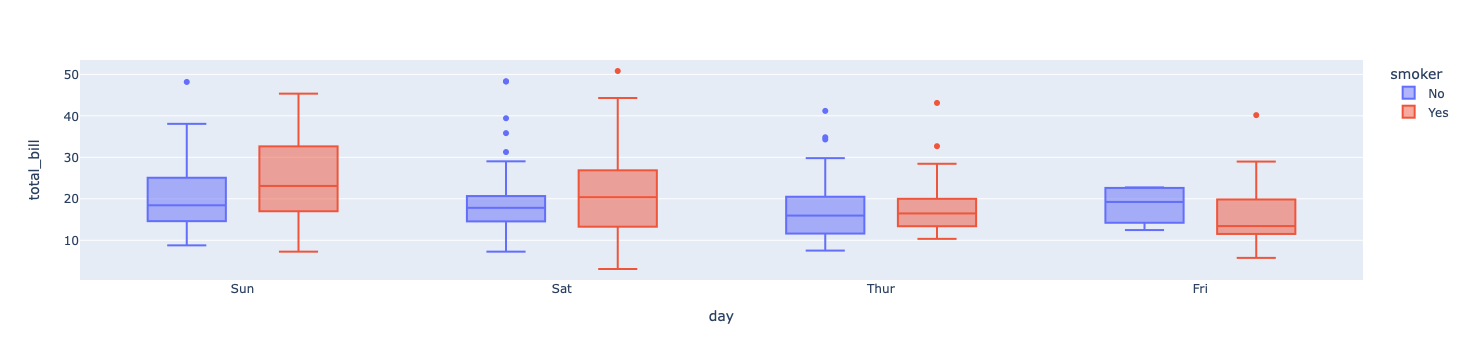

In [35]:
df = px.data.tips()
fig = px.box(df, 
             x="day", 
             y="total_bill", 
             color="smoker", 
             notched=False)
fig.show()

## Density

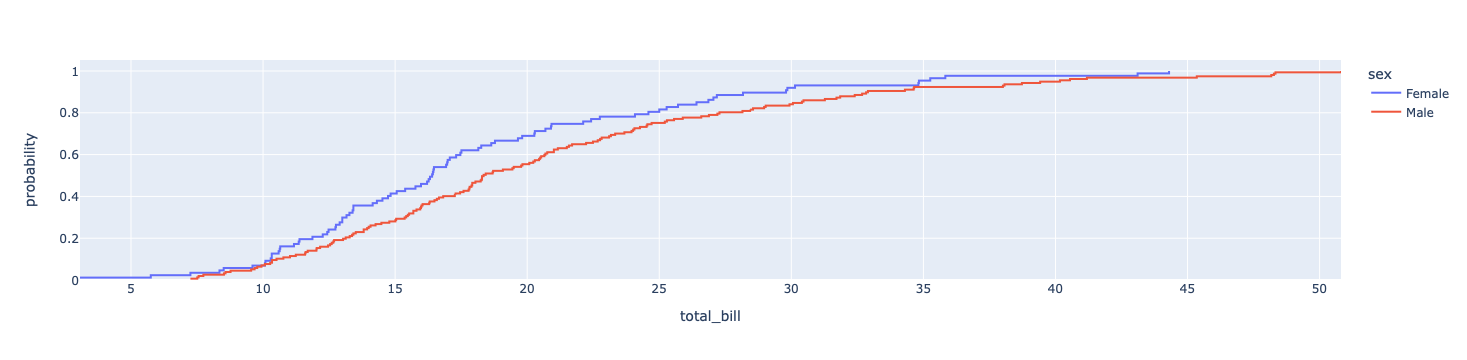

In [36]:
df = px.data.tips()
fig = px.ecdf(df, 
              x="total_bill", 
              color="sex")
fig.show()

## Heatmap

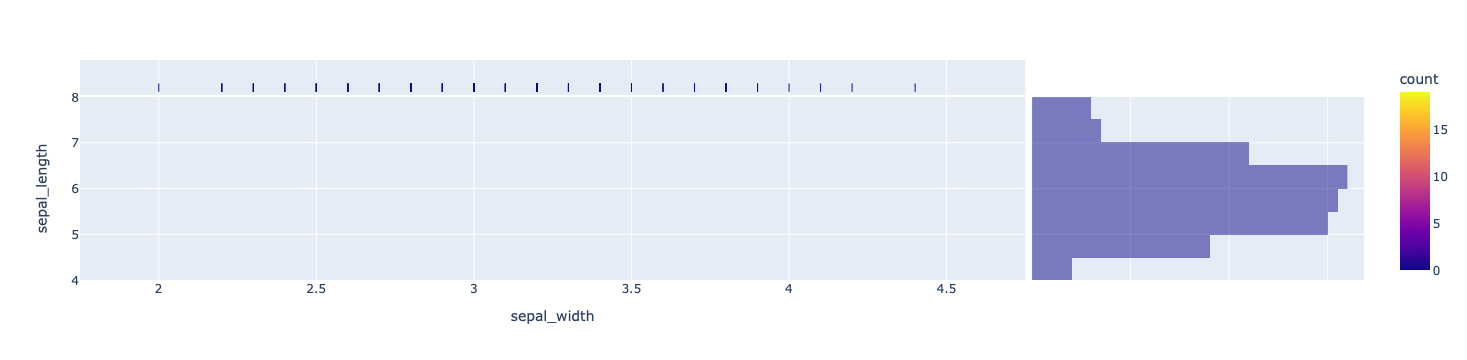

In [37]:
df = px.data.iris()
fig = px.density_heatmap(df, 
                         x="sepal_width", 
                         y="sepal_length", 
                         marginal_x="rug", 
                         marginal_y="histogram")
fig.show()

## Scatter

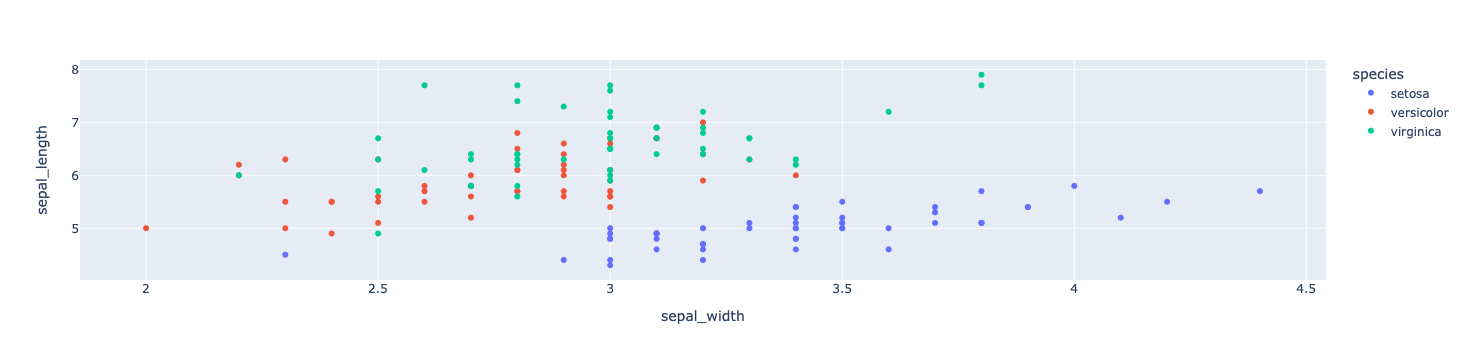

In [10]:
df = px.data.iris()
fig = px.scatter(df, 
                 x="sepal_width", 
                 y="sepal_length", 
                 color="species")
fig.show()

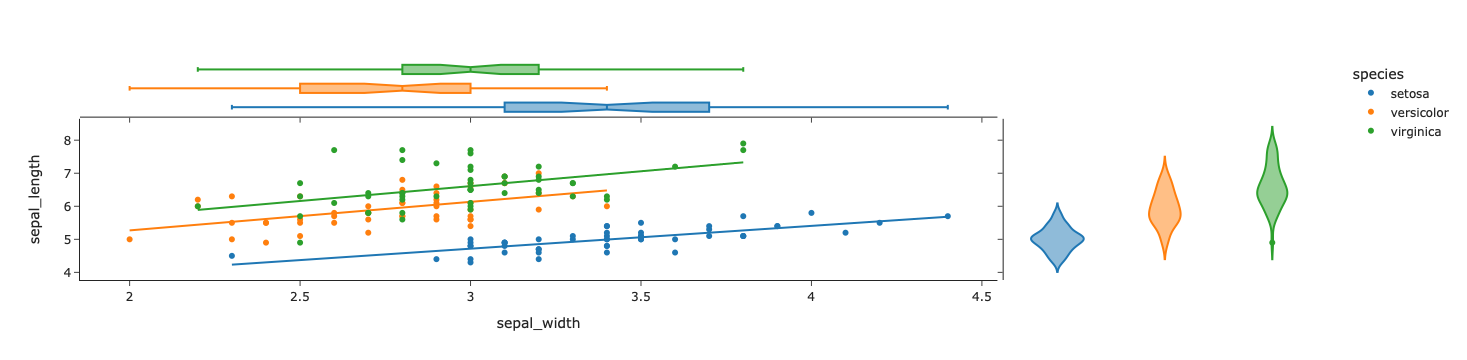

In [12]:
df = px.data.iris()
fig = px.scatter(df, 
                 x="sepal_width", 
                 y="sepal_length", 
                 color="species", 
                 marginal_y="violin",
                 marginal_x="box", 
                 trendline="ols", 
                 template="simple_white")
fig.show()

## Scatter animation

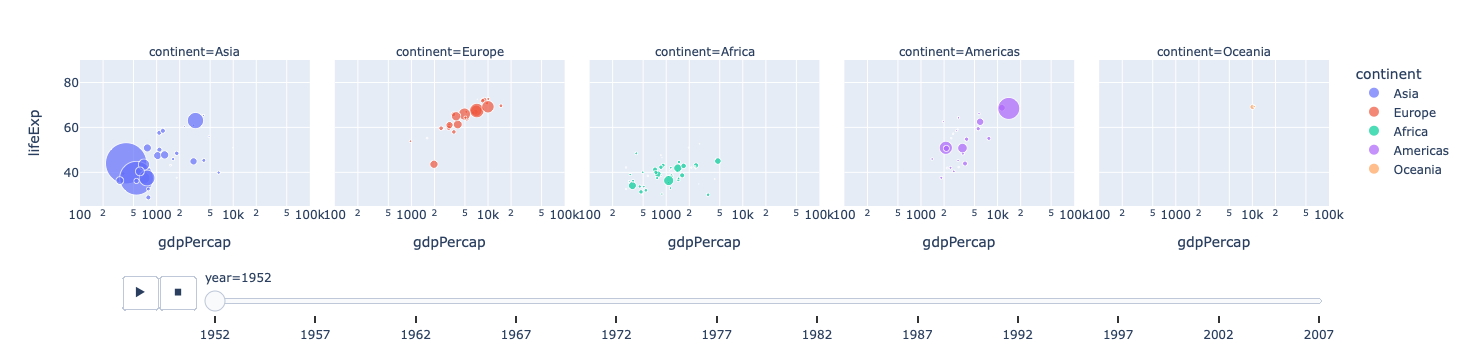

In [23]:
df = px.data.gapminder()
fig = px.scatter(df, 
                 x="gdpPercap", 
                 y="lifeExp", 
                 animation_frame="year", 
                 animation_group="country",
                 size="pop", 
                 color="continent", 
                 hover_name="country", 
                 facet_col="continent",
                 log_x=True, 
                 size_max=45, 
                 range_x=[100,100000], 
                 range_y=[25,90])
fig.show()

## Scatter matrix

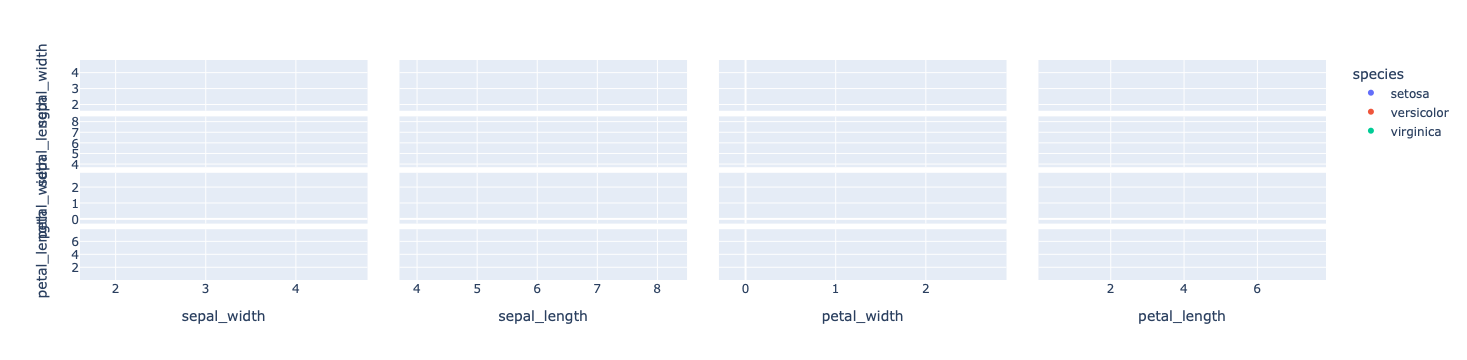

In [15]:
df = px.data.iris()
fig = px.scatter_matrix(df, 
                        dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"], 
                        color="species")
fig.show()

## Bar

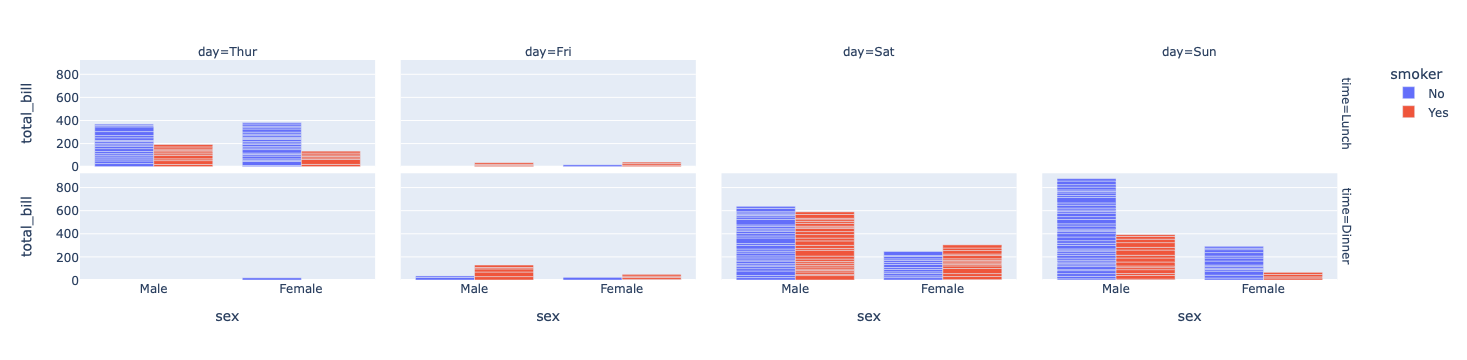

In [14]:
df = px.data.tips()
fig = px.bar(df, 
             x="sex", 
             y="total_bill", 
             color="smoker", 
             barmode="group", 
             facet_row="time", 
             facet_col="day",
             category_orders={"day": ["Thur", "Fri", "Sat", "Sun"], "time": ["Lunch", "Dinner"]})
fig.show()

## Line

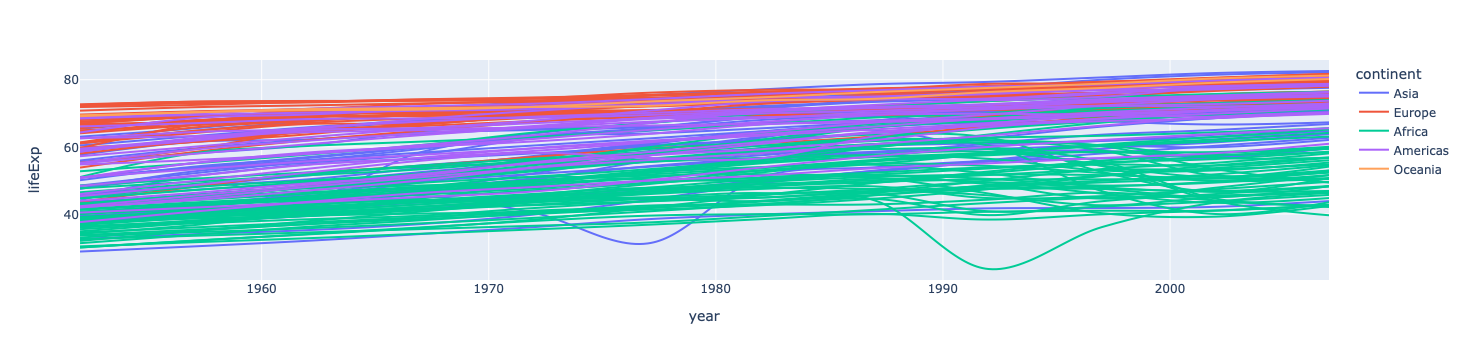

In [27]:
df = px.data.gapminder()
fig = px.line(df, 
              x="year", 
              y="lifeExp", 
              color="continent", 
              line_group="country", 
              hover_name="country",
              line_shape="spline", 
              render_mode="svg")
fig.show()

## Area

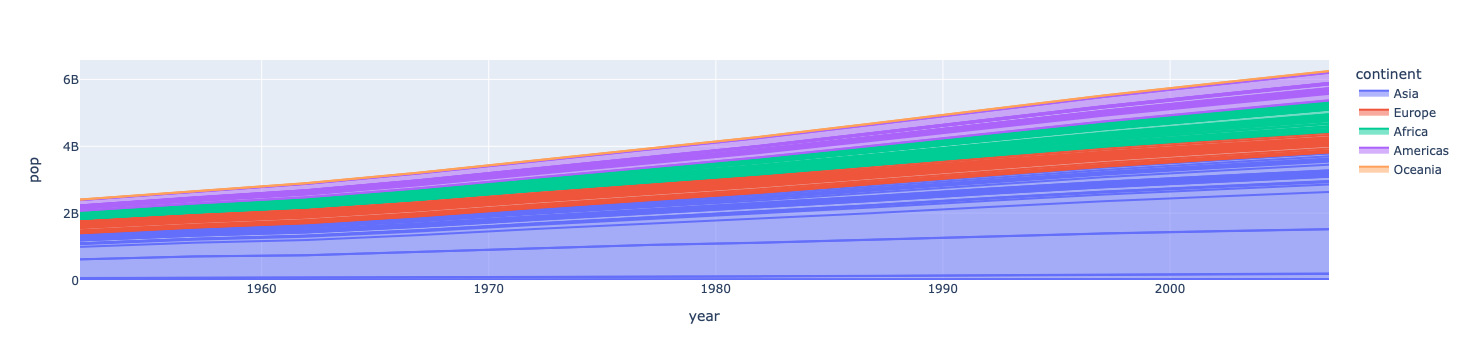

In [28]:
df = px.data.gapminder()
fig = px.area(df, 
              x="year", 
              y="pop", 
              color="continent", 
              line_group="country")
fig.show()

## Time series

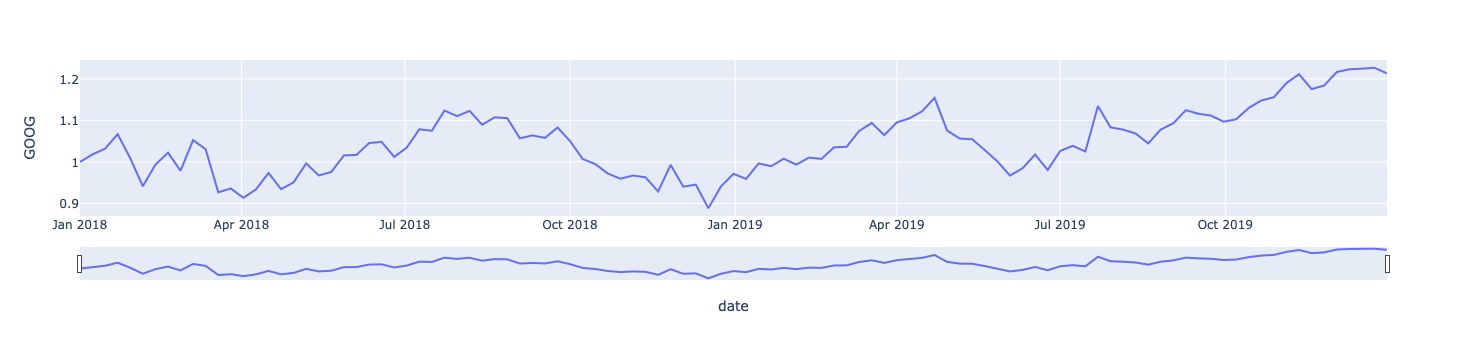

In [26]:
df = px.data.stocks()
fig = px.line(df, 
              x = "date", 
              y = "GOOG")

fig.update_xaxes(rangeslider_visible = True)

fig.show()

## Funnel

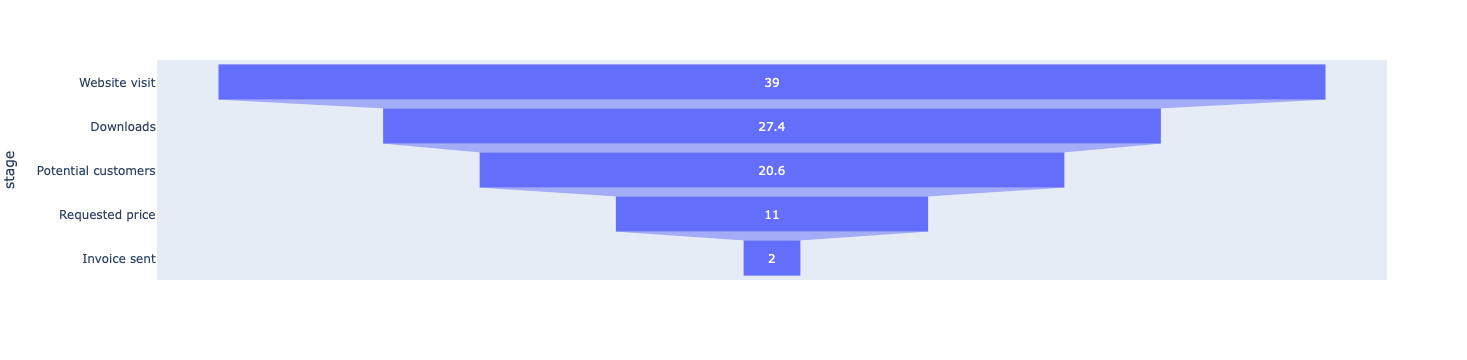

In [29]:
data = dict(
    number = [39, 27.4, 20.6, 11, 2],
    stage = ['Website visit', 'Downloads', 'Potential customers', 'Requested price', 'Invoice sent']
)

fig = px.funnel(data, x = 'number', y = 'stage')
fig.show()

## Stacked funnel

In [4]:
stages = ['Website visit', 'Downloads', 'Potential customers', 'Requested price', 'Invoice sent']
df_mtl = pd.DataFrame(dict(number = [39, 27.4, 20.6, 11, 3], stage = stages))
df_mtl['office'] = 'Montreal'
df_toronto = pd.DataFrame(dict(number = [52, 36, 18, 14, 5], stage = stages))
df_toronto['office'] = 'Toronto'
df = pd.concat([df_mtl, df_toronto], axis = 0)
df

number                stage    office
0    39.0        Website visit  Montreal
1    27.4            Downloads  Montreal
2    20.6  Potential customers  Montreal
3    11.0      Requested price  Montreal
4     3.0         Invoice sent  Montreal
0    52.0        Website visit   Toronto
1    36.0            Downloads   Toronto
2    18.0  Potential customers   Toronto
3    14.0      Requested price   Toronto
4     5.0         Invoice sent   Toronto

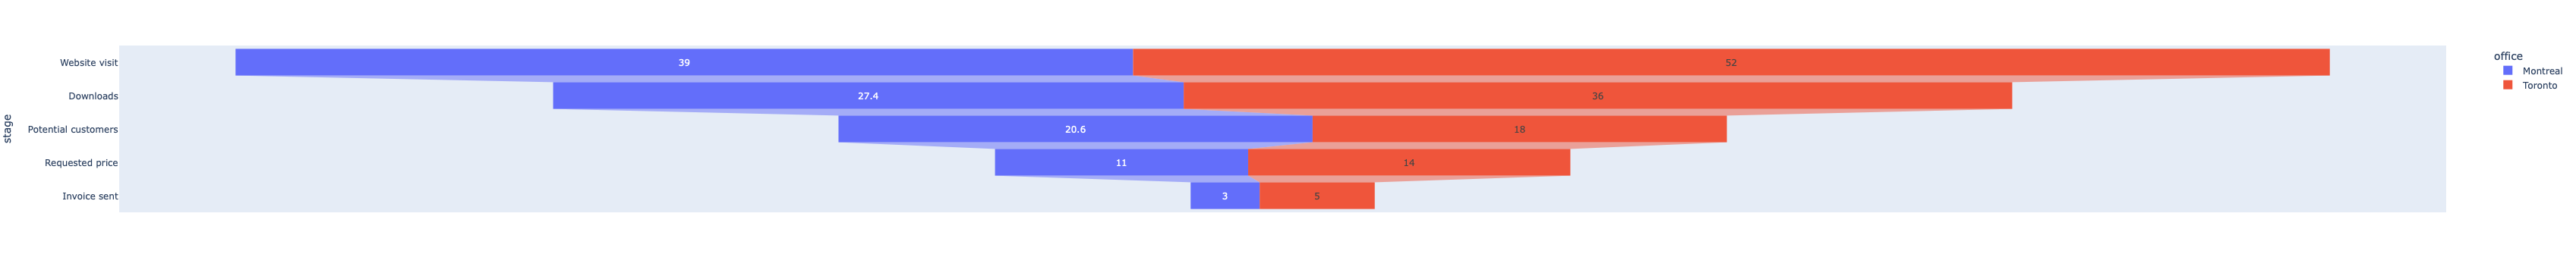

In [5]:
fig = px.funnel(df, x = 'number', y = 'stage', color = 'office')
fig.show()

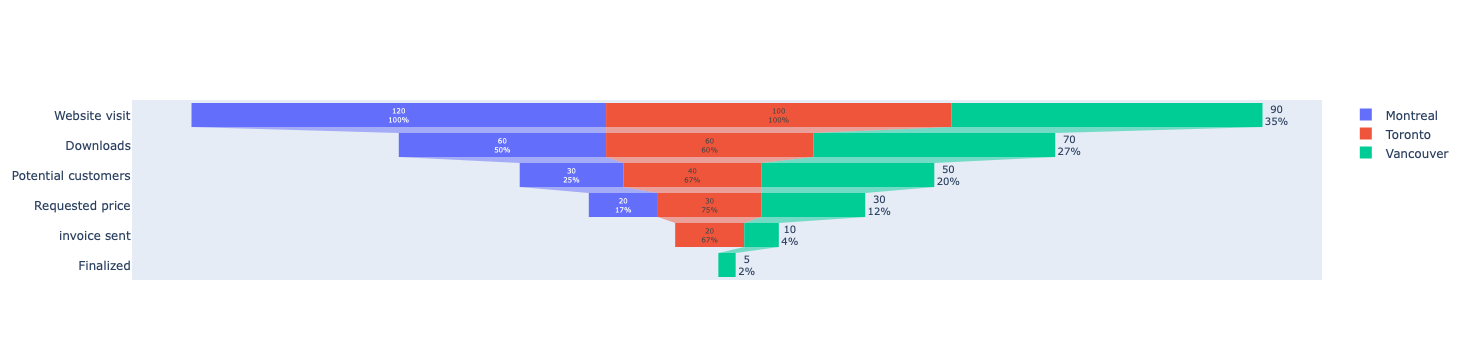

In [30]:
fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'Montreal',
    y = ["Website visit", "Downloads", "Potential customers", "Requested price"],
    x = [120, 60, 30, 20],
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'Toronto',
    orientation = "h",
    y = ["Website visit", "Downloads", "Potential customers", "Requested price", "invoice sent"],
    x = [100, 60, 40, 30, 20],
    textposition = "inside",
    textinfo = "value+percent previous"))

fig.add_trace(go.Funnel(
    name = 'Vancouver',
    orientation = "h",
    y = ["Website visit", "Downloads", "Potential customers", "Requested price", "invoice sent", "Finalized"],
    x = [90, 70, 50, 30, 10, 5],
    textposition = "outside",
    textinfo = "value+percent total"))

fig.show()

## Area funnel

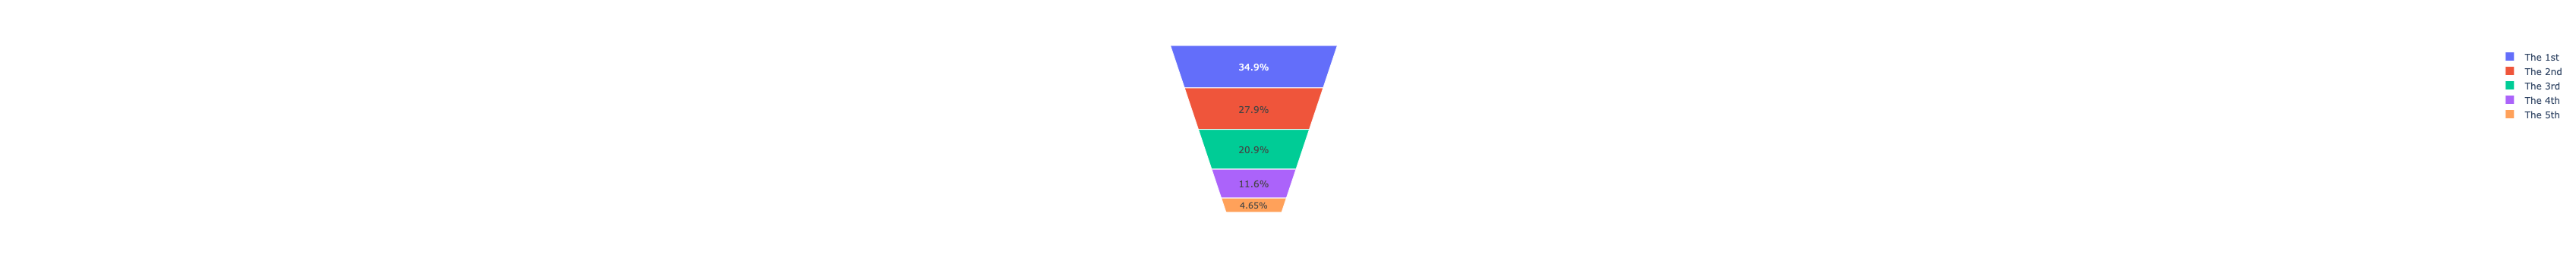

In [6]:
fig = px.funnel_area(names = ['The 1st', 'The 2nd', 'The 3rd', 'The 4th', 'The 5th'],
                     values = [15, 12, 9, 5, 2])
fig.show()

## Sunburst

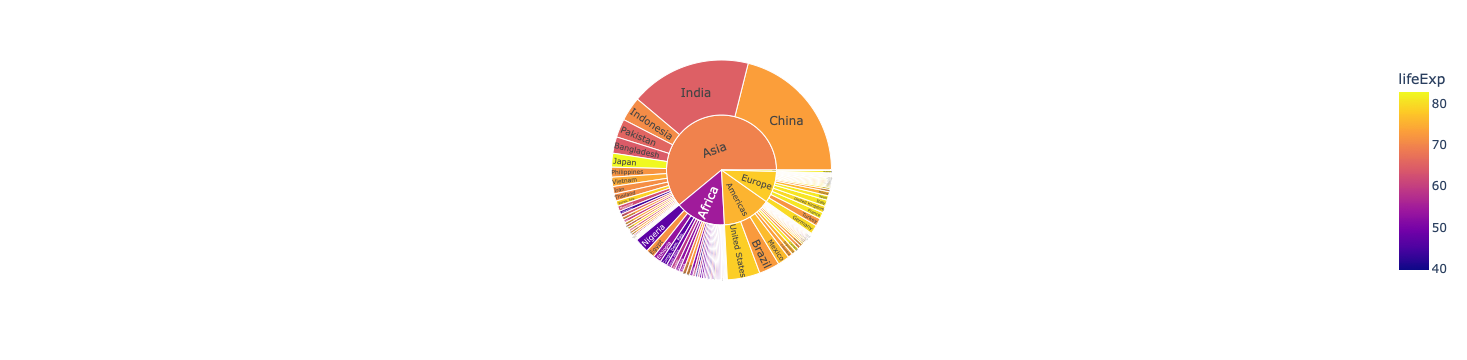

In [31]:
df = px.data.gapminder().query("year == 2007")
fig = px.sunburst(df, 
                  path=['continent', 'country'], 
                  values='pop',
                  color='lifeExp', 
                  hover_data=['iso_alpha'])
fig.show()

## Treemap

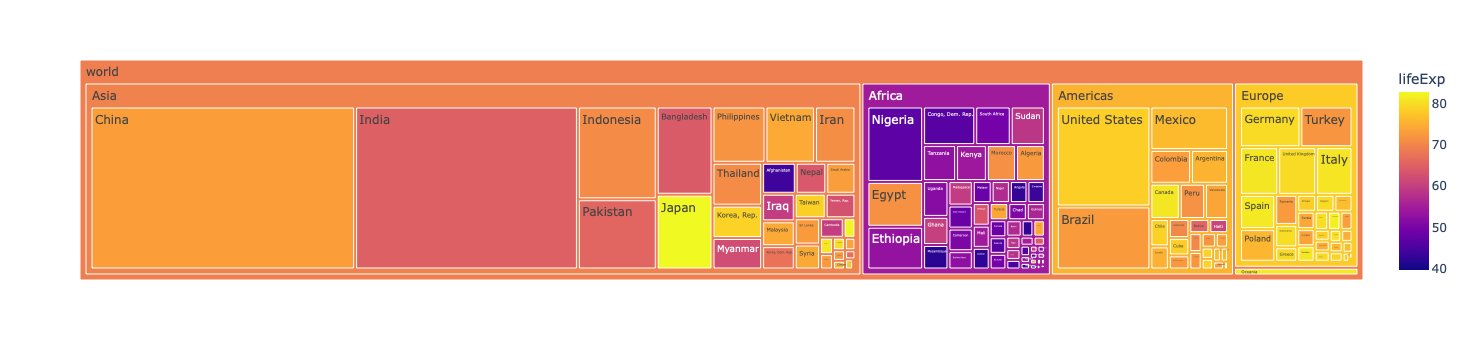

In [32]:
df = px.data.gapminder().query("year == 2007")
fig = px.treemap(df, 
                 path=[px.Constant('world'), 'continent', 'country'], 
                 values='pop',
                 color='lifeExp', 
                 hover_data=['iso_alpha'])
fig.show()

## Parallel coordinates

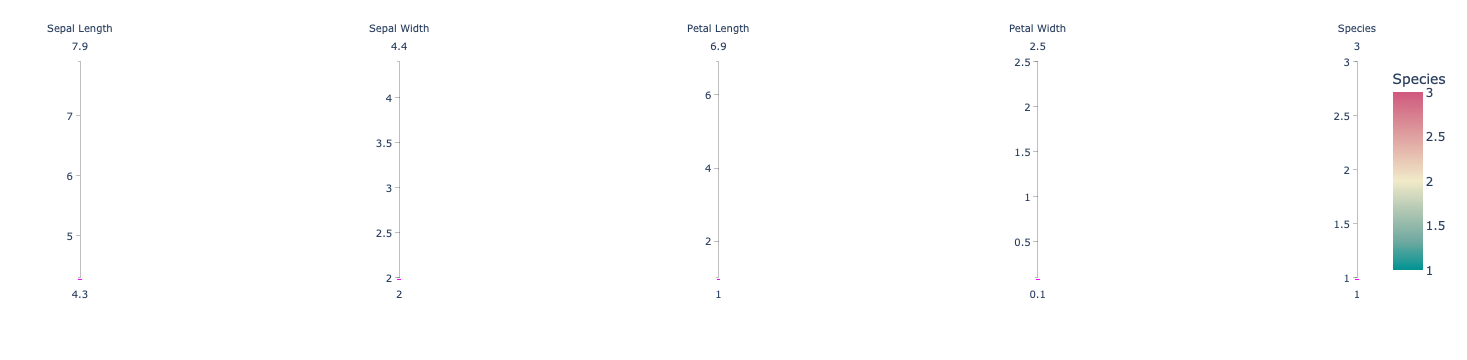

In [16]:
df = px.data.iris()
fig = px.parallel_coordinates(df, 
                              color="species_id", 
                              labels={"species_id": "Species","sepal_width": "Sepal Width", "sepal_length": "Sepal Length","petal_width": "Petal Width", "petal_length": "Petal Length", },
                              color_continuous_scale=px.colors.diverging.Tealrose, 
                              color_continuous_midpoint=2)
fig.show()

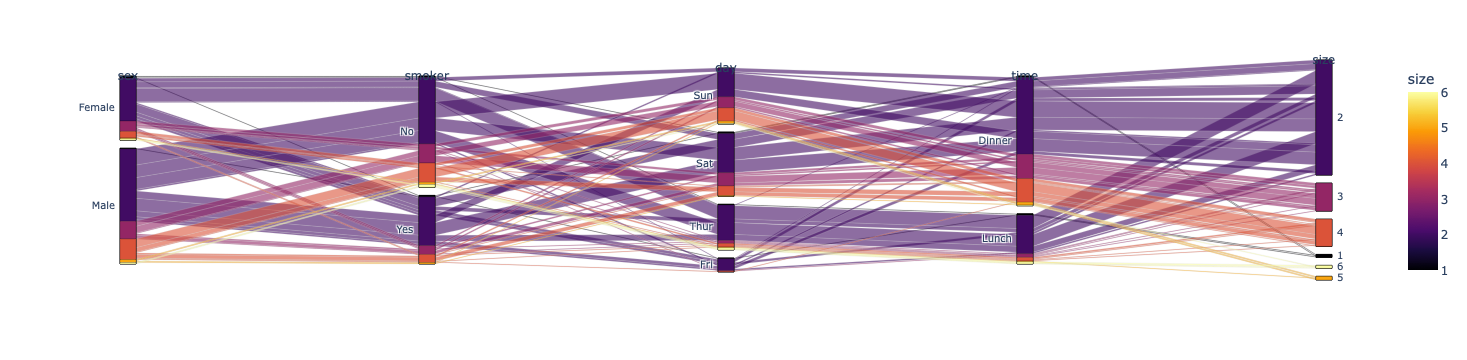

In [17]:
df = px.data.tips()
fig = px.parallel_categories(df, 
                             color="size", 
                             color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

## Sankey diagram

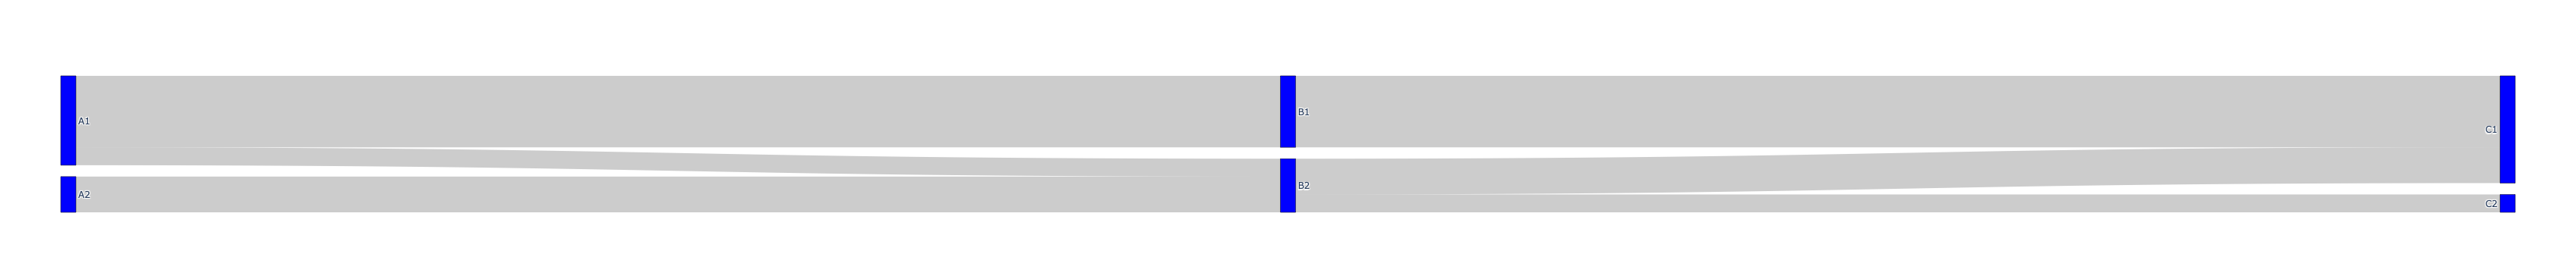

In [7]:
data = [go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = 'black', width = 0.5),
        label = ['A1','A2','B1','B2','C1','C2'],
        color = 'blue'),
    link = dict(
        source = [0, 1, 0, 2, 3, 3],
        target = [2, 3, 3, 4, 4, 5],
        value = [8, 4, 2, 8, 4, 2]))]

fig = go.Figure(data = data)
fig.show()

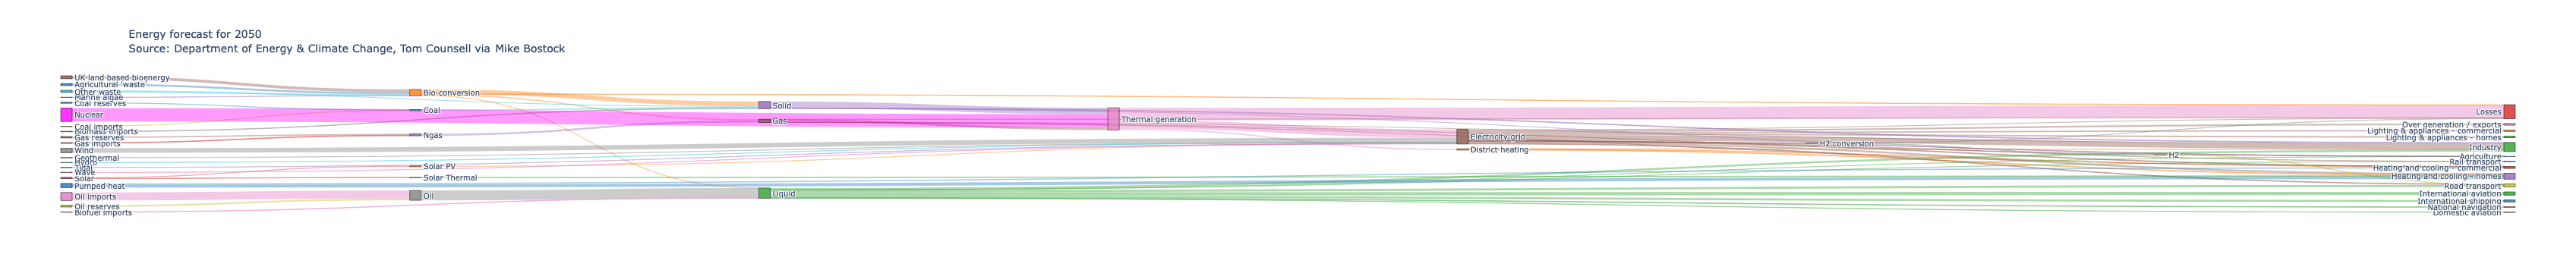

In [8]:
import plotly.graph_objects as go
import urllib, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

# override gray link colors with 'source' colors
opacity = 0.4
# change 'magenta' to its 'rgba' value to add opacity
data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                                    for src in data['data'][0]['link']['source']]

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.update_layout(title_text="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
                  font_size=10)
fig.show()

## Map - scatter

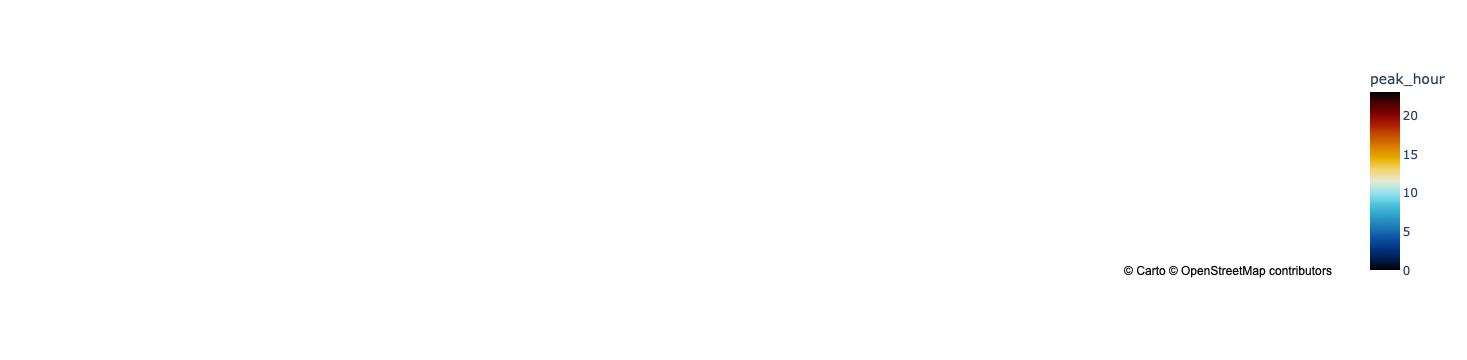

In [38]:
df = px.data.carshare()
fig = px.scatter_mapbox(df, 
                        lat="centroid_lat", 
                        lon="centroid_lon", 
                        color="peak_hour", 
                        size="car_hours",
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, 
                        zoom=10,
                        mapbox_style="carto-positron")
fig.show()

## Map - choropleth

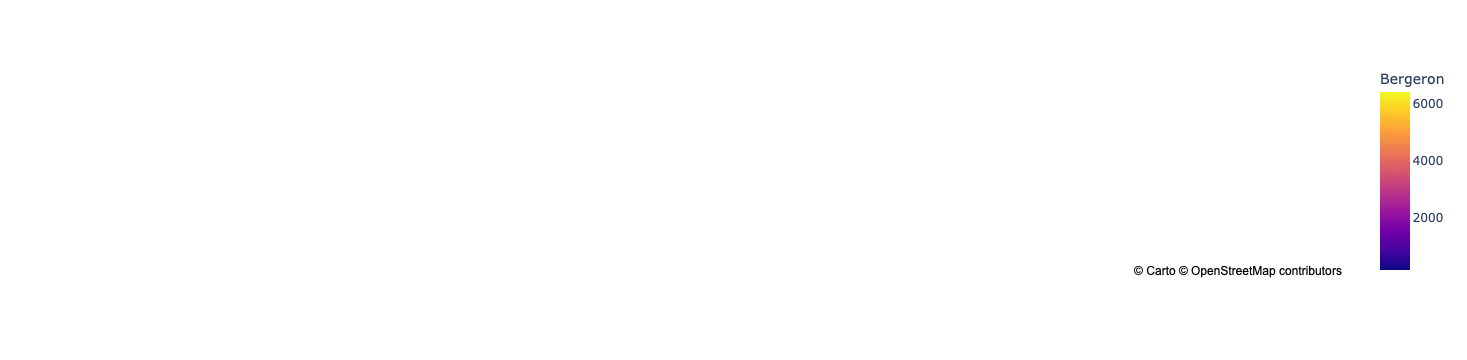

In [39]:
df = px.data.election()
geojson = px.data.election_geojson()

fig = px.choropleth_mapbox(df, 
                           geojson=geojson, 
                           color="Bergeron",
                           locations="district", 
                           featureidkey="properties.district",
                           center={"lat": 45.5517, "lon": -73.7073},
                           mapbox_style="carto-positron", 
                           zoom=9)
fig.show()

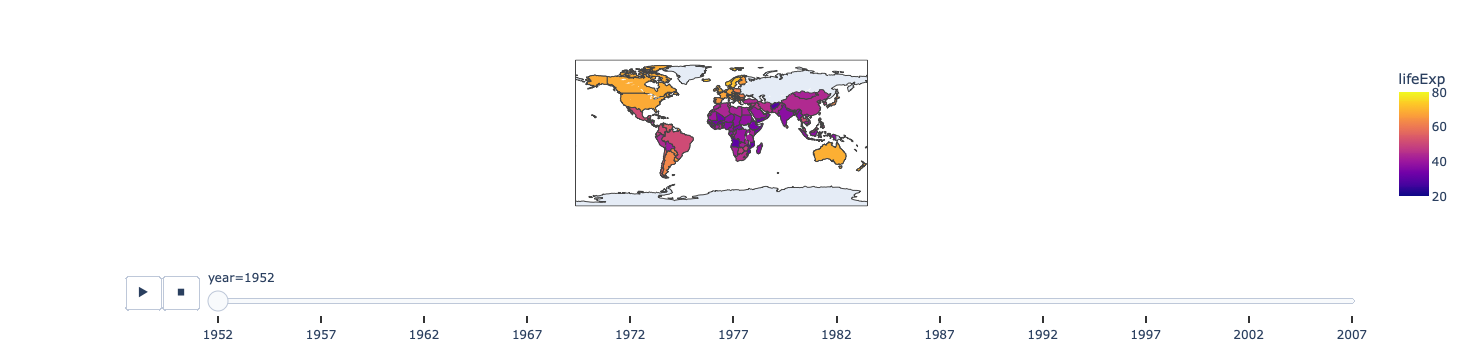

In [40]:
df = px.data.gapminder()
fig = px.choropleth(df, 
                    locations="iso_alpha", 
                    color="lifeExp", 
                    hover_name="country", 
                    animation_frame="year", 
                    range_color=[20,80])
fig.show()

## Ploar coordinates

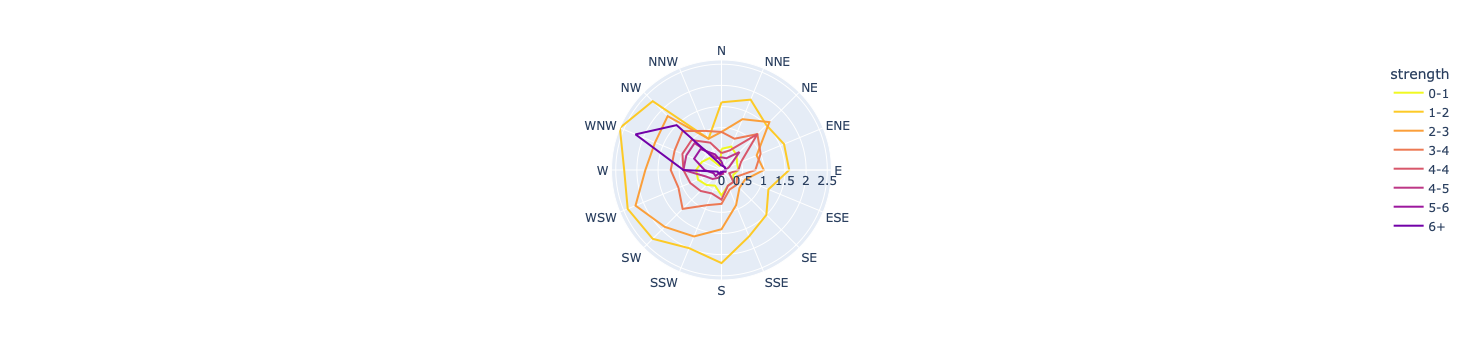

In [42]:
df = px.data.wind()
fig = px.line_polar(df, 
                    r="frequency", 
                    theta="direction", 
                    color="strength", 
                    line_close=True,
                    color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.show()

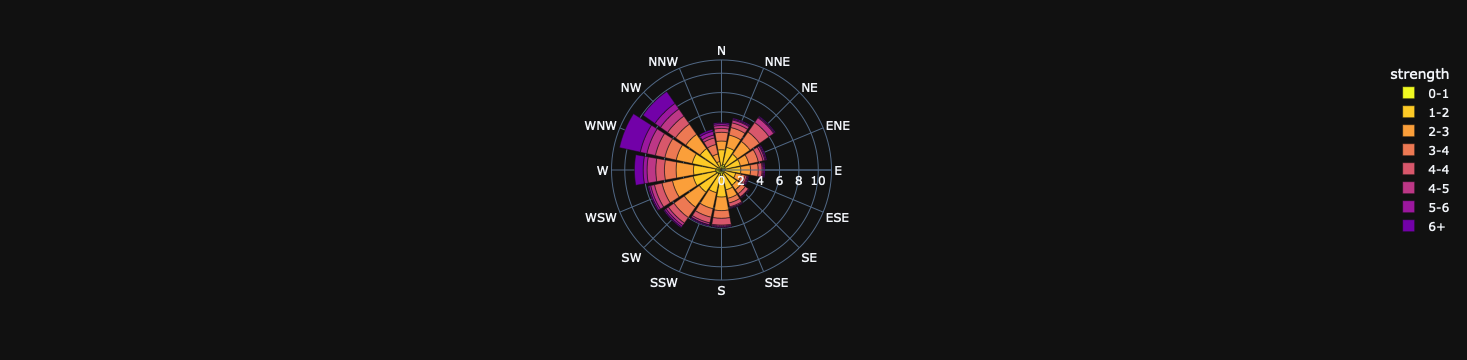

In [43]:
df = px.data.wind()
fig = px.bar_polar(df, 
                   r="frequency", 
                   theta="direction", 
                   color="strength", 
                   template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

## 3D

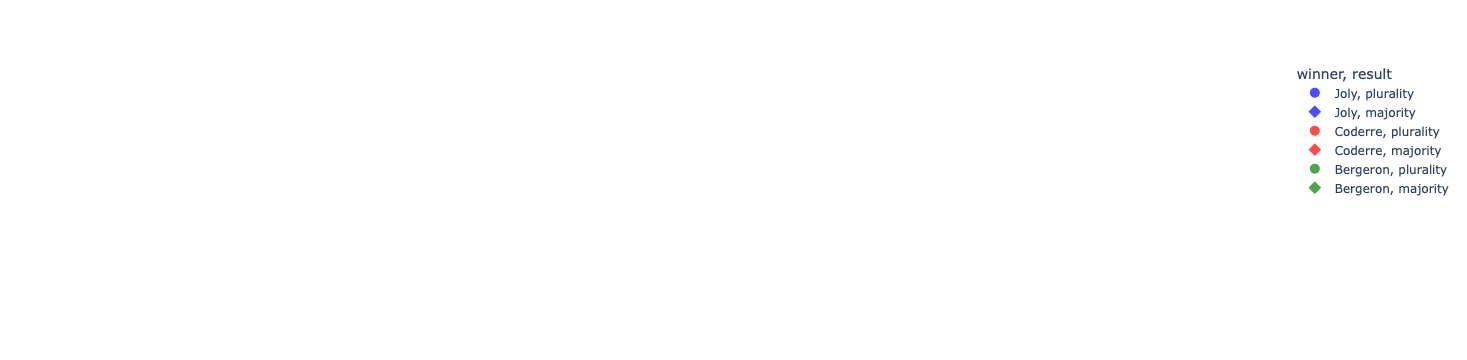

In [44]:
df = px.data.election()
fig = px.scatter_3d(df, 
                    x="Joly", 
                    y="Coderre", 
                    z="Bergeron", 
                    color="winner", 
                    size="total", 
                    hover_name="district",
                    symbol="result", 
                    color_discrete_map = {"Joly": "blue", "Bergeron": "green", "Coderre":"red"})
fig.show()